# Evaluation

The evaluation of the results is performed with the help of the ClayRS framework. The documentation is available at: https://swapuniba.github.io/ClayRS/

In [ ]:
# Install dependencies
!python -m pip install clayrs

## Preprocessing

For further usage in the ClayRS framework data preprocessing is required.

Split "query_articles_recommendations_bws_bm25_df.csv" into the for ClayRS required "rank_list" and truth_list".

- "rank_list": consists of the BM-25 recommendations
- "truth_list": consits of the Best-Worst Scaling (BWS) results of the expert study

In [3]:
import pandas as pd
query_articles_recommendations_bws_bm25_df = pd.read_csv("../query_Articles_recommendations_bws_bm25_df.csv")

truth_list = query_articles_recommendations_bws_bm25_df[['editor_name_BWS','query_article_BWS','article_id_BWS','TOP-K_BWS','Score_BWS']].copy()
truth_list['user_id'] =  query_articles_recommendations_bws_bm25_df['editor_name_BWS']+"-"+query_articles_recommendations_bws_bm25_df['query_article_BWS']
truth_list = truth_list[['user_id','article_id_BWS','TOP-K_BWS']]
truth_list.to_csv("truth_BWS.csv",index=False)

rank_list = query_articles_recommendations_bws_bm25_df[['editor_name_BM25','query_article_BM25','article_id_BM25','TOP-K_BM25','Score_BM25']].copy()
rank_list['user_id'] =  query_articles_recommendations_bws_bm25_df['editor_name_BM25']+"-"+query_articles_recommendations_bws_bm25_df['query_article_BM25']
rank_list = rank_list[['user_id','article_id_BM25','TOP-K_BM25']]
rank_list.to_csv("rank_BM25.csv",index=False)

In [ ]:
# The content analyzer tool helps to import the data and format them for the "EvalModel" of ClayRS.
import clayrs.content_analyzer as ca

imported_truth = ca.Ratings(ca.CSVFile('truth_BWS.csv'))
imported_rank = ca.Rank(ca.CSVFile('rank_BM25.csv'))

In [5]:
imported_truth_test = ca.Ratings.from_dataframe(truth_list)
imported_rank_test = ca.Rank.from_dataframe(rank_list)

In [6]:
print(imported_truth)

                                  user_id                     item_id  score
0       brnada-FALTER_20211201_1FE873026D  FALTER_20220608_E67B54FF98    1.0
1       brnada-FALTER_20211201_1FE873026D  FALTER_20220330_73CAF44312    2.0
2       brnada-FALTER_20211201_1FE873026D  FALTER_20220126_5FA47BB63A    3.0
3       brnada-FALTER_20211201_1FE873026D  FALTER_20220119_DC6490CEC7    4.0
4       brnada-FALTER_20211201_1FE873026D  FALTER_20211215_AF0C90B712    5.0
...                                   ...                         ...    ...
2515  thurnher-FALTER_20220615_712D78A192  FALTER_20220525_B332E0066F   11.0
2516  thurnher-FALTER_20220615_712D78A192  FALTER_20220824_23AE4161B4   12.0
2517  thurnher-FALTER_20220615_712D78A192  FALTER_20220615_58EE1B7D7A   13.0
2518  thurnher-FALTER_20220615_712D78A192  FALTER_20220803_106498EA98   14.0
2519  thurnher-FALTER_20220615_712D78A192  FALTER_20211222_A35407C20B   15.0

[2520 rows x 3 columns]


In [7]:
# For the analysis of the results we use the "EvalModel" of ClayRS
import clayrs.evaluation as eva
import numpy as np

em = eva.EvalModel(
    [imported_rank],
    [imported_truth],
    metric_list=[
        eva.Correlation(method='spearman', top_n=3),
        eva.Correlation(method='spearman', top_n=5),
        eva.Correlation(method='spearman', top_n=10),
        eva.Correlation(method='spearman', top_n=None)
    ]
)

In [8]:
sys_results_df, users_results_df = em.fit(user_id_list=None)

INFO - Performing evaluation on metrics chosen
Performing spearman:  100%|██████████| 4/4 [00:01<00:00]        


In [9]:
sys_results_df

,spearman - Top 3,spearman - Top 5,spearman - Top 10,spearman
user_id,,,,
sys - fold1,0.208333,0.220833,0.234776,0.195791
sys - mean,0.208333,0.220833,0.234776,0.195791


In [10]:
user_results_sorted =  users_results_df.sort_values(by=['spearman'],ascending=False)
user_results_sorted

,spearman - Top 3,spearman - Top 5,spearman - Top 10,spearman
user_id,,,,
matzinger-FALTER_20220209_5CA8DCBD6D,-0.5,0.7,0.830303,0.900000
thurnher-FALTER_20220427_EAD82E8BFA,1.0,-0.1,0.636364,0.807143
dusini-FALTER_20220427_B3A080073E,0.5,0.8,0.430303,0.735714
konzett-FALTER_20220511_71668B1344,-1.0,0.6,0.296970,0.721429
nuechtern-FALTER_20220601_A6AE0B2BDE,-1.0,0.1,0.551515,0.721429
...,...,...,...,...
omasta-FALTER_20220608_0942739322,-0.5,-0.5,-0.454545,-0.335714
nuechtern-FALTER_20220518_9910096646,0.5,0.3,0.212121,-0.439286
stoeger-FALTER_20220511_945D8A7943,1.0,0.9,-0.187879,-0.485714


<AxesSubplot:>

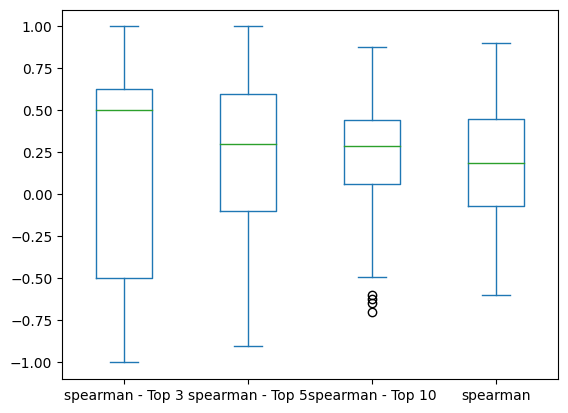

In [12]:
user_results_sorted.plot(kind='box')